**Chapter 10 – Introduction to Artificial Neural Networks with Keras**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
#assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

N_JOBS = 3

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42, n_jobs=N_JOBS)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


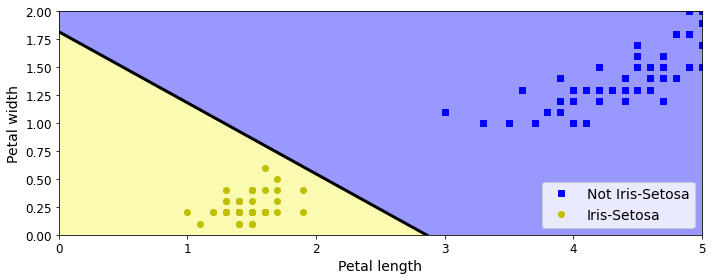

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


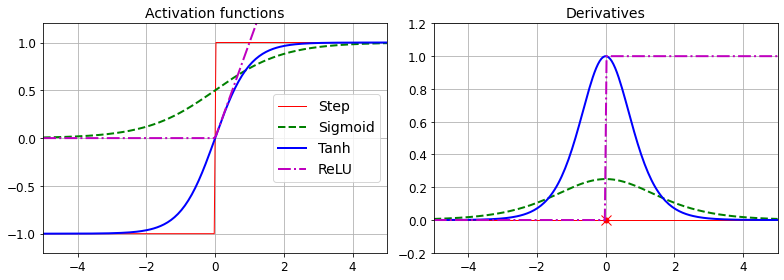

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

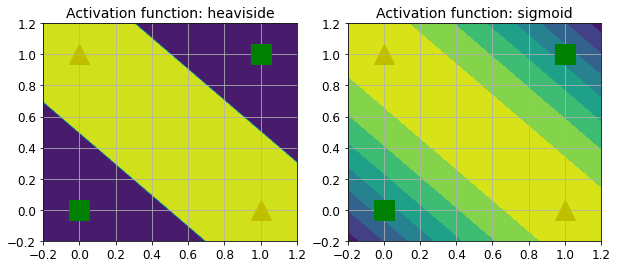

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
tf.__version__

'2.6.1'

In [11]:
keras.__version__

'2.6.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [13]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [14]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

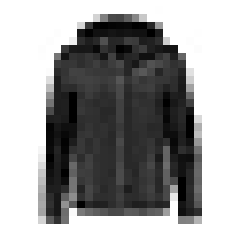

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [19]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

Saving figure fashion_mnist_plot


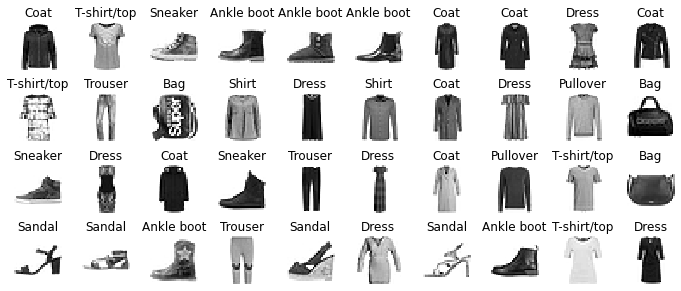

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [24]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [30]:
model.get_layer(hidden1.name) is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
biases.shape

(300,)

In [36]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [37]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4842 - accuracy: 0.8316 - val_loss: 0.4349 - val_accuracy: 0.8528
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4391 - accuracy: 0.8456 - val_loss: 0.5281 - val_accuracy: 0.8008
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3920 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3939 - accuracy: 0.8619 - val_loss: 0.3746 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3752 - accuracy: 0.8677 - val_loss: 0.3719 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3632 - accuracy: 0.8715 - val_loss: 0.3612 - val_accuracy:

In [38]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


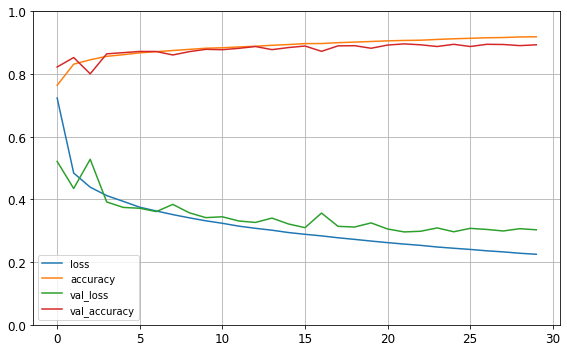

In [41]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.8826


[0.3363315761089325, 0.8826000094413757]

In [43]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [44]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [45]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [46]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


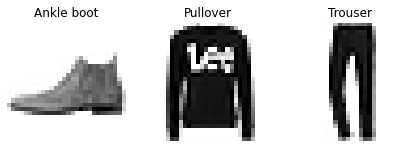

In [47]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [48]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [49]:
np.random.seed(42)
tf.random.set_seed(42)

In [50]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 978us/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 981us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 780us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 780us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 758us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 747us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 940us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 939us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 725us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 915us/step - loss: 0.487

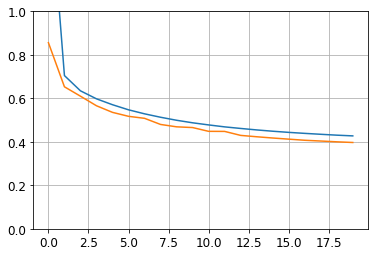

In [51]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

# Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [56]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 893us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 799us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 832us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 895us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 862us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 754us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 995us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 962us/step - loss: 0.4659 - 

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [59]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 934us/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 893us/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 898us/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 786us/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 857us/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 906us/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 792us/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 868us/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4644 - 

Adding an auxiliary output for regularization:

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [62]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [63]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - ETA: 0s - loss: 0.8927 - main_output_loss: 0.6947 - aux_output_loss: 2.67 - 0s 1ms/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - 

In [64]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 867us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


# The subclassing API

In [65]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [66]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 973us/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 0s 857us/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - 

# Saving and Restoring

In [67]:
np.random.seed(42)
tf.random.set_seed(42)

In [68]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [69]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 716us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 950us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 898us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 747us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 777us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 992us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 873us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 716us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 558us/step - loss: 0.4382


In [70]:
model.save("my_keras_model.h5")

In [71]:
model = keras.models.load_model("my_keras_model.h5")

In [72]:
model.predict(X_new)

array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [73]:
model.save_weights("my_keras_weights.ckpt")

In [74]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [75]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [77]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 962us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 931us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 901us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 777us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 745us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 829us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 807us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 703us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 551us/step - loss: 0.4382


In [78]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 884us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 862us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 832us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 809us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 738us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 849us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 807us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 752us/step - loss:

Epoch 80/100
363/363 [==============================] - 0s 777us/step - loss: 0.3329 - val_loss: 0.3353
Epoch 81/100
363/363 [==============================] - 0s 758us/step - loss: 0.3324 - val_loss: 0.3276
Epoch 82/100
363/363 [==============================] - 0s 887us/step - loss: 0.3320 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 0s 895us/step - loss: 0.3317 - val_loss: 0.3281
Epoch 84/100
363/363 [==============================] - 0s 771us/step - loss: 0.3312 - val_loss: 0.3636
Epoch 85/100
363/363 [==============================] - 0s 747us/step - loss: 0.3310 - val_loss: 0.3175
Epoch 86/100
363/363 [==============================] - 0s 835us/step - loss: 0.3308 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 0s 835us/step - loss: 0.3305 - val_loss: 0.3532
Epoch 88/100
363/363 [==============================] - 0s 733us/step - loss: 0.3299 - val_loss: 0.3256
Epoch 89/100
363/363 [==============================] - 0s 890us

In [79]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [80]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 0s 1ms/step - loss: 0.3302 - val_loss: 0.3559

val/train: 1.08


# TensorBoard

In [81]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [82]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_03_07-18_42_58'

In [83]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [84]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [85]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 846us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 824us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 818us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 943us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 953us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 840us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 818us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 843us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 762us/step - loss: 0.4474 

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [86]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [87]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_03_07-18_43_13'

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [90]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5530 - val_loss: 302.8466
Epoch 2/30
363/363 [==============================] - 0s 780us/step - loss: 63.6669 - val_loss: 0.9735
Epoch 3/30
363/363 [==============================] - 0s 978us/step - loss: 0.9411 - val_loss: 0.9599
Epoch 4/30
363/363 [==============================] - 0s 978us/step - loss: 0.9197 - val_loss: 0.8464
Epoch 5/30
363/363 [==============================] - 0s 997us/step - loss: 0.9819 - val_loss: 0.9281
Epoch 6/30
363/363 [==============================] - 0s 865us/step - loss: 0.9240 - val_loss: 0.9089
Epoch 7/30
363/363 [==============================] - 0s 840us/step - loss: 0.9179 - val_loss: 0.8815
Epoch 8/30
363/363 [==============================] - 0s 904us/step - loss: 0.8950 - val_loss: 0.9007
Epoch 9/30
363/363 [==============================] - 0s 942us/step - loss: 0.9150 - val_loss: 0.8734
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.8921

Notice how TensorBoard now sees two runs, and you can compare the learning curves.

Check out the other available logging options:

In [91]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [92]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [93]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [94]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [95]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 988us/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 730us/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 846us/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 978us/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 741us/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 719us/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 807us/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 792us/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 805us/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 978us/step - 

In [96]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 551us/step - loss: 0.3412


In [97]:
y_pred = keras_reg.predict(X_new)

In [98]:
np.random.seed(42)
tf.random.set_seed(42)

**Warning**: the following cell crashes at the end of training. This seems to be caused by [Keras issue #13586](https://github.com/keras-team/keras/issues/13586), which was triggered by a recent change in Scikit-Learn. [Pull Request #13598](https://github.com/keras-team/keras/pull/13598) seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added `.tolist()` and `.rvs(1000).tolist()` as workarounds.

In [99]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8420 - val_loss: 0.4703
Epoch 2/100
242/242 [==============================] - 0s 828us/step - loss: 0.4815 - val_loss: 0.4247
Epoch 3/100
242/242 [==============================] - 0s 815us/step - loss: 0.4519 - val_loss: 0.4052
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4429 - val_loss: 0.3975
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4368 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4340 - val_loss: 0.4031
Epoch 7/100
242/242 [==============================] - 0s 910us/step - loss: 0.4351 - val_loss: 0.4043
Epoch 8/100
242/242 [==============================] - 0s 948us/step - loss: 0.4267 - val_loss: 0.3929
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4258 - val_loss: 0.4040
Epoch 10/100
242/242 [

242/242 [==============================] - 0s 1ms/step - loss: 0.3852 - val_loss: 0.5336
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3746 - val_loss: 0.6750
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3678 - val_loss: 0.8462
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3610 - val_loss: 0.8724
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3554 - val_loss: 0.9645
Epoch 10/100
242/242 [==============================] - 0s 865us/step - loss: 0.3525 - val_loss: 0.7225
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3475 - val_loss: 0.7257
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3442 - val_loss: 0.7216
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3422 - val_loss: 0.8440
Epoch 14/100
121/121 [==============================] - 0s 573us/step - loss: 0.3650
[CV] END lea

242/242 [==============================] - 0s 783us/step - loss: 0.5671 - val_loss: 0.5266
Epoch 25/100
242/242 [==============================] - 0s 807us/step - loss: 0.5614 - val_loss: 0.5214
Epoch 26/100
242/242 [==============================] - 0s 906us/step - loss: 0.5558 - val_loss: 0.5166
Epoch 27/100
242/242 [==============================] - 0s 852us/step - loss: 0.5504 - val_loss: 0.5116
Epoch 28/100
242/242 [==============================] - 0s 857us/step - loss: 0.5453 - val_loss: 0.5076
Epoch 29/100
242/242 [==============================] - 0s 811us/step - loss: 0.5403 - val_loss: 0.5035
Epoch 30/100
242/242 [==============================] - 0s 774us/step - loss: 0.5356 - val_loss: 0.4989
Epoch 31/100
242/242 [==============================] - 0s 861us/step - loss: 0.5309 - val_loss: 0.4946
Epoch 32/100
242/242 [==============================] - 0s 861us/step - loss: 0.5265 - val_loss: 0.4915
Epoch 33/100
242/242 [==============================] - 0s 836us/step - loss:

242/242 [==============================] - 0s 820us/step - loss: 0.6937 - val_loss: 2.9997
Epoch 12/100
242/242 [==============================] - 0s 927us/step - loss: 0.6814 - val_loss: 2.6082
Epoch 13/100
242/242 [==============================] - 0s 894us/step - loss: 0.6701 - val_loss: 2.2766
Epoch 14/100
242/242 [==============================] - 0s 848us/step - loss: 0.6593 - val_loss: 1.9984
Epoch 15/100
242/242 [==============================] - 0s 770us/step - loss: 0.6491 - val_loss: 1.7447
Epoch 16/100
242/242 [==============================] - 0s 786us/step - loss: 0.6395 - val_loss: 1.5300
Epoch 17/100
242/242 [==============================] - 0s 898us/step - loss: 0.6303 - val_loss: 1.3410
Epoch 18/100
242/242 [==============================] - 0s 807us/step - loss: 0.6217 - val_loss: 1.1762
Epoch 19/100
242/242 [==============================] - 0s 795us/step - loss: 0.6133 - val_loss: 1.0345
Epoch 20/100
242/242 [==============================] - 0s 795us/step - loss:

242/242 [==============================] - 0s 917us/step - loss: 0.4764 - val_loss: 0.4525
Epoch 50/100
242/242 [==============================] - 0s 898us/step - loss: 0.4740 - val_loss: 0.4495
Epoch 51/100
242/242 [==============================] - 0s 890us/step - loss: 0.4716 - val_loss: 0.4468
Epoch 52/100
242/242 [==============================] - 0s 792us/step - loss: 0.4693 - val_loss: 0.4446
Epoch 53/100
242/242 [==============================] - 0s 823us/step - loss: 0.4670 - val_loss: 0.4420
Epoch 54/100
242/242 [==============================] - 0s 918us/step - loss: 0.4649 - val_loss: 0.4394
Epoch 55/100
242/242 [==============================] - 0s 881us/step - loss: 0.4628 - val_loss: 0.4373
Epoch 56/100
242/242 [==============================] - 0s 886us/step - loss: 0.4607 - val_loss: 0.4349
Epoch 57/100
242/242 [==============================] - 0s 761us/step - loss: 0.4588 - val_loss: 0.4330
Epoch 58/100
242/242 [==============================] - 0s 768us/step - loss:

242/242 [==============================] - 0s 910us/step - loss: 0.3679 - val_loss: 0.3839
Epoch 27/100
242/242 [==============================] - 0s 833us/step - loss: 0.3654 - val_loss: 0.4167
Epoch 28/100
242/242 [==============================] - 0s 935us/step - loss: 0.3637 - val_loss: 0.3500
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3607 - val_loss: 0.3792
Epoch 30/100
242/242 [==============================] - 0s 919us/step - loss: 0.3602 - val_loss: 0.3636
Epoch 31/100
242/242 [==============================] - 0s 864us/step - loss: 0.3576 - val_loss: 0.3476
Epoch 32/100
242/242 [==============================] - 0s 844us/step - loss: 0.3566 - val_loss: 0.3566
Epoch 33/100
242/242 [==============================] - 0s 956us/step - loss: 0.3548 - val_loss: 0.3611
Epoch 34/100
242/242 [==============================] - 0s 902us/step - loss: 0.3541 - val_loss: 0.3414
Epoch 35/100
242/242 [==============================] - 0s 902us/step - loss: 0

242/242 [==============================] - 0s 952us/step - loss: 0.4633 - val_loss: 0.4297
Epoch 9/100
242/242 [==============================] - 0s 828us/step - loss: 0.4483 - val_loss: 0.4464
Epoch 10/100
242/242 [==============================] - 0s 840us/step - loss: 0.4374 - val_loss: 0.4189
Epoch 11/100
242/242 [==============================] - 0s 981us/step - loss: 0.4266 - val_loss: 0.4438
Epoch 12/100
242/242 [==============================] - 0s 964us/step - loss: 0.4188 - val_loss: 0.4250
Epoch 13/100
242/242 [==============================] - 0s 915us/step - loss: 0.4121 - val_loss: 0.4009
Epoch 14/100
242/242 [==============================] - 0s 848us/step - loss: 0.4067 - val_loss: 0.4403
Epoch 15/100
242/242 [==============================] - 0s 927us/step - loss: 0.4025 - val_loss: 0.4014
Epoch 16/100
242/242 [==============================] - 0s 981us/step - loss: 0.3981 - val_loss: 0.4247
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.

242/242 [==============================] - 0s 761us/step - loss: 1.4803 - val_loss: 216.7274
Epoch 11/100
242/242 [==============================] - 0s 790us/step - loss: 13.8366 - val_loss: 125.2067
Epoch 12/100
242/242 [==============================] - 0s 778us/step - loss: 0.6450 - val_loss: 2.2902
Epoch 13/100
242/242 [==============================] - 0s 721us/step - loss: 0.7449 - val_loss: 790.5425
Epoch 14/100
242/242 [==============================] - 0s 753us/step - loss: 9.2398 - val_loss: 468.7425
Epoch 15/100
242/242 [==============================] - 0s 770us/step - loss: 2.2300 - val_loss: 1073.9153
Epoch 16/100
242/242 [==============================] - 0s 845us/step - loss: 37.3801 - val_loss: 865.6381
Epoch 17/100
242/242 [==============================] - 0s 790us/step - loss: 8.9708 - val_loss: 1128.1495
Epoch 18/100
242/242 [==============================] - 0s 779us/step - loss: 3.8291 - val_loss: 499.5189
Epoch 19/100
242/242 [==============================] - 0

242/242 [==============================] - 0s 845us/step - loss: 0.3366 - val_loss: 0.3227
Epoch 27/100
242/242 [==============================] - 0s 819us/step - loss: 0.3342 - val_loss: 0.4466
Epoch 28/100
242/242 [==============================] - 0s 844us/step - loss: 0.3358 - val_loss: 0.3322
Epoch 29/100
242/242 [==============================] - 0s 952us/step - loss: 0.3332 - val_loss: 0.3982
Epoch 30/100
242/242 [==============================] - 0s 944us/step - loss: 0.3323 - val_loss: 0.3431
Epoch 31/100
242/242 [==============================] - 0s 898us/step - loss: 0.3294 - val_loss: 0.3346
Epoch 32/100
242/242 [==============================] - 0s 857us/step - loss: 0.3279 - val_loss: 0.3637
Epoch 33/100
242/242 [==============================] - 0s 906us/step - loss: 0.3271 - val_loss: 0.3467
Epoch 34/100
242/242 [==============================] - 0s 952us/step - loss: 0.3243 - val_loss: 0.3582
Epoch 35/100
242/242 [==============================] - 0s 989us/step - loss:

Epoch 20/100
242/242 [==============================] - 0s 824us/step - loss: 0.4080 - val_loss: 0.4001
Epoch 21/100
242/242 [==============================] - 0s 993us/step - loss: 0.4050 - val_loss: 0.4263
Epoch 22/100
242/242 [==============================] - 0s 960us/step - loss: 0.4027 - val_loss: 0.4032
Epoch 23/100
242/242 [==============================] - 0s 919us/step - loss: 0.4002 - val_loss: 0.4039
Epoch 24/100
242/242 [==============================] - 0s 890us/step - loss: 0.3981 - val_loss: 0.3764
Epoch 25/100
242/242 [==============================] - 0s 757us/step - loss: 0.3962 - val_loss: 0.4241
Epoch 26/100
242/242 [==============================] - 0s 844us/step - loss: 0.3944 - val_loss: 0.3779
Epoch 27/100
242/242 [==============================] - 0s 894us/step - loss: 0.3925 - val_loss: 0.4126
Epoch 28/100
242/242 [==============================] - 0s 861us/step - loss: 0.3910 - val_loss: 0.3967
Epoch 29/100
242/242 [==============================] - 0s 832us

Epoch 38/100
242/242 [==============================] - 0s 852us/step - loss: 0.3770 - val_loss: 0.5522
Epoch 39/100
242/242 [==============================] - 0s 948us/step - loss: 0.3792 - val_loss: 0.5648
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3763 - val_loss: 0.6416
Epoch 41/100
242/242 [==============================] - 0s 981us/step - loss: 0.3785 - val_loss: 0.3847
Epoch 42/100
242/242 [==============================] - 0s 815us/step - loss: 0.3729 - val_loss: 0.5255
Epoch 43/100
242/242 [==============================] - 0s 786us/step - loss: 0.3744 - val_loss: 0.7023
Epoch 44/100
242/242 [==============================] - 0s 770us/step - loss: 0.3741 - val_loss: 0.7508
Epoch 45/100
121/121 [==============================] - 0s 640us/step - loss: 0.3745
[CV] END learning_rate=0.0020587676114196545, n_hidden=1, n_neurons=49; total time=   9.4s
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.0682 - val_loss: 6.41

242/242 [==============================] - 0s 857us/step - loss: 0.2575 - val_loss: 0.2839
Epoch 71/100
242/242 [==============================] - 0s 886us/step - loss: 0.2563 - val_loss: 0.4576
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2567 - val_loss: 0.2928
Epoch 73/100
242/242 [==============================] - 0s 927us/step - loss: 0.2541 - val_loss: 0.3401
Epoch 74/100
242/242 [==============================] - 0s 919us/step - loss: 0.2534 - val_loss: 0.2755
Epoch 75/100
242/242 [==============================] - 0s 927us/step - loss: 0.2530 - val_loss: 0.3753
Epoch 76/100
242/242 [==============================] - 0s 935us/step - loss: 0.2526 - val_loss: 0.2755
Epoch 77/100
242/242 [==============================] - 0s 935us/step - loss: 0.2539 - val_loss: 0.3902
Epoch 78/100
121/121 [==============================] - 0s 549us/step - loss: 0.3093
[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=  18.5s
Epoch 1/

242/242 [==============================] - 0s 1ms/step - loss: 0.2757 - val_loss: 0.3002
Epoch 55/100
242/242 [==============================] - 0s 886us/step - loss: 0.2741 - val_loss: 0.2820
Epoch 56/100
242/242 [==============================] - 0s 993us/step - loss: 0.2740 - val_loss: 0.3077
Epoch 57/100
121/121 [==============================] - 0s 623us/step - loss: 0.2931
[CV] END learning_rate=0.005803602934201024, n_hidden=3, n_neurons=74; total time=  13.7s
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 0.9615 - val_loss: 10.9251
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5921 - val_loss: 3.3912
Epoch 3/100
242/242 [==============================] - 0s 927us/step - loss: 0.4539 - val_loss: 0.4039
Epoch 4/100
242/242 [==============================] - 0s 853us/step - loss: 0.3914 - val_loss: 0.3693
Epoch 5/100
242/242 [==============================] - 0s 859us/step - loss: 0.3713 - val_loss: 0.3554
Epoch 6/100
242/

242/242 [==============================] - 1s 1ms/step - loss: 0.8683 - val_loss: 2.2007
Epoch 2/100
242/242 [==============================] - 0s 994us/step - loss: 0.5072 - val_loss: 3.3028
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4486 - val_loss: 0.9130
Epoch 4/100
242/242 [==============================] - 0s 931us/step - loss: 0.4071 - val_loss: 0.5328
Epoch 5/100
242/242 [==============================] - 0s 923us/step - loss: 0.3842 - val_loss: 0.3609
Epoch 6/100
242/242 [==============================] - 0s 927us/step - loss: 0.3729 - val_loss: 0.4151
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3659 - val_loss: 0.3580
Epoch 8/100
242/242 [==============================] - 0s 968us/step - loss: 0.3596 - val_loss: 0.3516
Epoch 9/100
242/242 [==============================] - 0s 898us/step - loss: 0.3528 - val_loss: 0.3983
Epoch 10/100
242/242 [==============================] - 0s 968us/step - loss: 0.3511 - val_

Epoch 43/100
242/242 [==============================] - 0s 923us/step - loss: 0.3148 - val_loss: 0.3110
Epoch 44/100
242/242 [==============================] - 0s 968us/step - loss: 0.3112 - val_loss: 0.3381
Epoch 45/100
242/242 [==============================] - 0s 973us/step - loss: 0.3145 - val_loss: 0.3052
Epoch 46/100
242/242 [==============================] - 0s 857us/step - loss: 0.3103 - val_loss: 0.3269
Epoch 47/100
242/242 [==============================] - 0s 915us/step - loss: 0.3089 - val_loss: 0.3292
Epoch 48/100
242/242 [==============================] - 0s 989us/step - loss: 0.3120 - val_loss: 0.3221
Epoch 49/100
242/242 [==============================] - 0s 964us/step - loss: 0.3075 - val_loss: 0.3022
Epoch 50/100
242/242 [==============================] - 0s 920us/step - loss: 0.3069 - val_loss: 0.3504
Epoch 51/100
242/242 [==============================] - 0s 865us/step - loss: 0.3059 - val_loss: 0.3324
Epoch 52/100
242/242 [==============================] - 0s 950us

242/242 [==============================] - 0s 832us/step - loss: 0.3410 - val_loss: 0.5224
Epoch 25/100
242/242 [==============================] - 0s 931us/step - loss: 0.3438 - val_loss: 0.7689
Epoch 26/100
242/242 [==============================] - 0s 960us/step - loss: 0.3423 - val_loss: 0.8909
Epoch 27/100
242/242 [==============================] - 0s 973us/step - loss: 0.3448 - val_loss: 0.4864
Epoch 28/100
242/242 [==============================] - 0s 838us/step - loss: 0.3369 - val_loss: 0.6169
Epoch 29/100
242/242 [==============================] - 0s 878us/step - loss: 0.3373 - val_loss: 0.3470
Epoch 30/100
242/242 [==============================] - 0s 977us/step - loss: 0.3327 - val_loss: 0.5750
Epoch 31/100
242/242 [==============================] - 0s 964us/step - loss: 0.3332 - val_loss: 0.3685
Epoch 32/100
242/242 [==============================] - 0s 989us/step - loss: 0.3308 - val_loss: 0.7292
Epoch 33/100
121/121 [==============================] - 0s 706us/step - loss:

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000019695AA4310>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112...
                                                          0.00502142573

In [100]:
rnd_search_cv.best_params_

{'n_neurons': 74, 'n_hidden': 3, 'learning_rate': 0.005803602934201024}

In [101]:
rnd_search_cv.best_score_

-0.31833014885584515

In [102]:
rnd_search_cv.best_estimator_

In [103]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 551us/step - loss: 0.3029


-0.30288204550743103

In [104]:
model = rnd_search_cv.best_estimator_.model
model

In [105]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 551us/step - loss: 0.3029


0.30288204550743103

# Exercise solutions

## 1. to 9.

See appendix A.

## 10.

*Exercise: Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.*

Let's load the dataset:

In [106]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [107]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [108]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [109]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

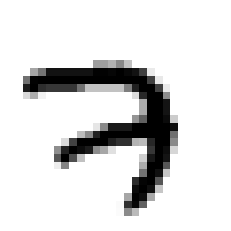

In [110]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a `class_names` array:

In [111]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [112]:
X_valid.shape

(5000, 28, 28)

In [113]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

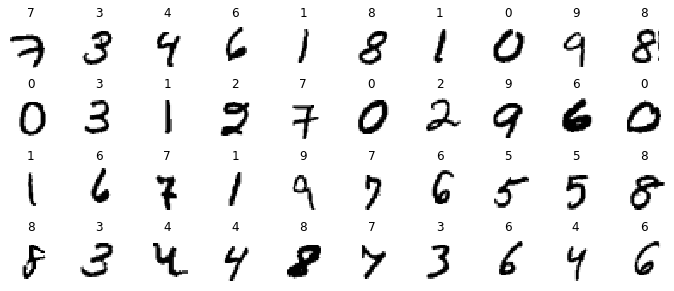

In [114]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [115]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [116]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [117]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [118]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [119]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 4s 2ms/step - loss: 5175061388354684784465674240.0000 - accuracy: 0.5927 - val_loss: 2.3911 - val_accuracy: 0.1126


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

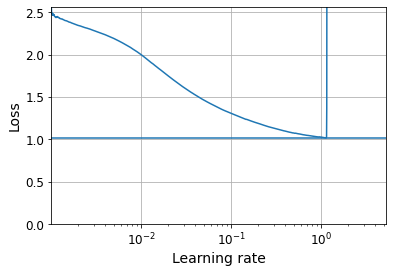

In [120]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [121]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [122]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [123]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [124]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [125]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2363 - accuracy: 0.9263 - val_loss: 0.0975 - val_accuracy: 0.9712
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0943 - accuracy: 0.9708 - val_loss: 0.0995 - val_accuracy: 0.9712
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0670 - accuracy: 0.9787 - val_loss: 0.0761 - val_accuracy: 0.9780
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0903 - val_accuracy: 0.9754
Epoch 5/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0372 - accuracy: 0.9877 - val_loss: 0.0729 - val_accuracy: 0.9820
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 0.0707 - val_accuracy: 0.9826
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0744 - val_ac

In [126]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 972us/step - loss: 0.0759 - accuracy: 0.9791


[0.07586495578289032, 0.9790999889373779]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [127]:
%tensorboard --logdir=./my_mnist_logs --port=6006